In [651]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as tm
import random

In [652]:
Data_File_Path = "./HappyCustomerDataset/ACME-HappinessSurvey2020.csv"
data_file = pd.read_csv(Data_File_Path)
print(data_file)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [653]:
data = data_file.copy()

Split data into X and Y sets.

In [654]:
X = data[['X1','X3','X4','X5','X6']].copy()
Y = data['Y'].copy()
print(X)

     X1  X3  X4  X5  X6
0     3   3   4   2   4
1     3   3   5   4   3
2     5   3   3   3   5
3     5   3   3   3   5
4     5   3   3   3   5
..   ..  ..  ..  ..  ..
121   5   3   4   4   3
122   5   3   4   2   5
123   5   3   4   4   5
124   4   3   4   4   5
125   5   2   5   5   5

[126 rows x 5 columns]


In [655]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64


Divide the data with maximum number in data to normalize it.

In [656]:
def min_max_scale(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_normalized = (X - min_vals) / (max_vals - min_vals)
    return X_normalized

Normalized_Data = min_max_scale(X)

print(Normalized_Data)

       X1    X3    X4    X5    X6
0    0.50  0.50  0.75  0.25  0.75
1    0.50  0.50  1.00  0.75  0.50
2    1.00  0.50  0.50  0.50  1.00
3    1.00  0.50  0.50  0.50  1.00
4    1.00  0.50  0.50  0.50  1.00
..    ...   ...   ...   ...   ...
121  1.00  0.50  0.75  0.75  0.50
122  1.00  0.50  0.75  0.25  1.00
123  1.00  0.50  0.75  0.75  1.00
124  0.75  0.50  0.75  0.75  1.00
125  1.00  0.25  1.00  1.00  1.00

[126 rows x 5 columns]


Split Train/Test set. 1st 100 instances as train set while remaining 26 instance as test set

In [657]:
X_train = Normalized_Data.iloc[:104]
X_test = Normalized_Data.iloc[104:]
y_train = Y.iloc[:104]
y_test = Y.iloc[104:]
y_test = y_test.values.reshape(-1, 1)
print(X_test)

       X1    X3    X4    X5    X6
104  0.75  0.50  1.00  0.50  1.00
105  1.00  0.75  0.50  1.00  1.00
106  1.00  1.00  0.50  1.00  1.00
107  0.75  0.75  0.75  0.75  0.75
108  1.00  0.75  0.75  1.00  1.00
109  1.00  0.75  0.75  0.75  0.75
110  1.00  0.50  0.75  0.75  1.00
111  1.00  0.50  0.75  0.75  0.75
112  1.00  0.50  0.50  0.75  0.75
113  1.00  0.50  0.50  0.75  0.75
114  1.00  0.75  0.50  0.75  1.00
115  1.00  1.00  0.75  1.00  1.00
116  0.50  0.75  1.00  0.00  0.50
117  1.00  1.00  1.00  1.00  1.00
118  0.75  0.50  0.75  0.75  0.75
119  1.00  0.00  0.00  1.00  0.00
120  0.75  0.75  0.75  0.00  0.50
121  1.00  0.50  0.75  0.75  0.50
122  1.00  0.50  0.75  0.25  1.00
123  1.00  0.50  0.75  0.75  1.00
124  0.75  0.50  0.75  0.75  1.00
125  1.00  0.25  1.00  1.00  1.00


Check if there is any null value in data

In [658]:
data_file.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

No null in data

Describe data

In [659]:
Normalized_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,126.0,0.833333,0.200000,0.0,0.75,1.00,1.00,1.0
X3,126.0,0.577381,0.255860,0.0,0.50,0.50,0.75,1.0
X4,126.0,0.686508,0.218944,0.0,0.50,0.75,0.75,1.0
X5,126.0,0.662698,0.286910,0.0,0.50,0.75,0.75,1.0
X6,126.0,0.813492,0.202328,0.0,0.75,0.75,1.00,1.0


Correlation Matrix

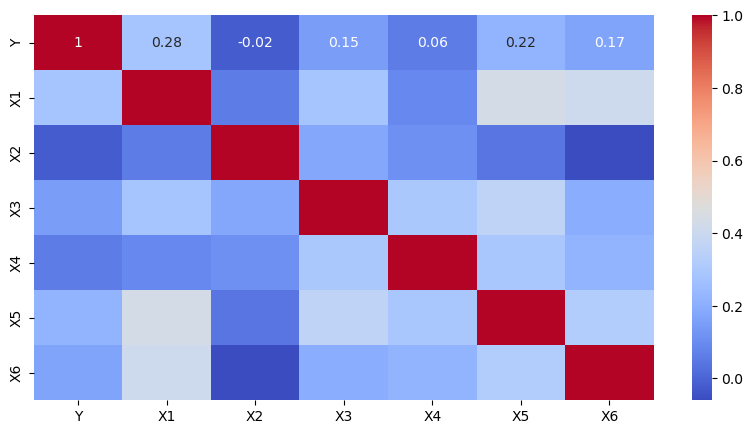

In [660]:
import seaborn as sns
Corr_Matrix = round(data_file.corr(),2)
fig, ax=plt.subplots(figsize=(10,5))
sns.heatmap(Corr_Matrix, annot=True, ax=ax, cmap='coolwarm');

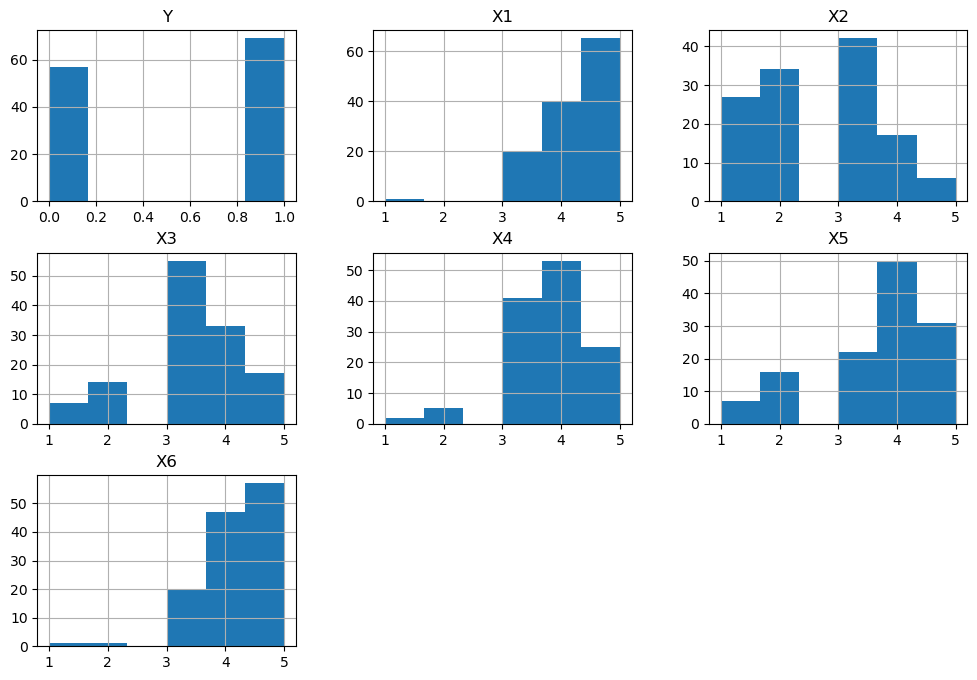

In [661]:
#Histograms of all features.
data.hist(bins=6, figsize=(12,8))
plt.show()

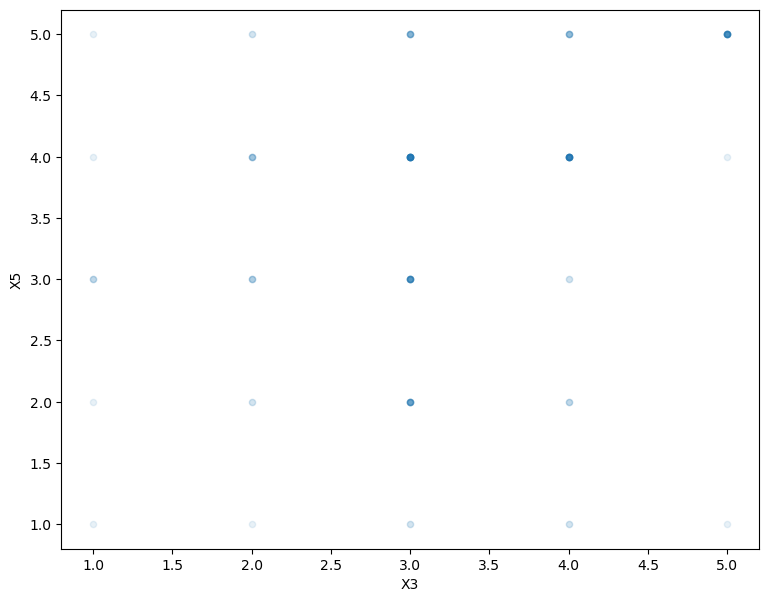

In [662]:
#scatterplot,
data.plot(kind="scatter", x="X3", y="X5",figsize=(9,7),alpha=0.1);

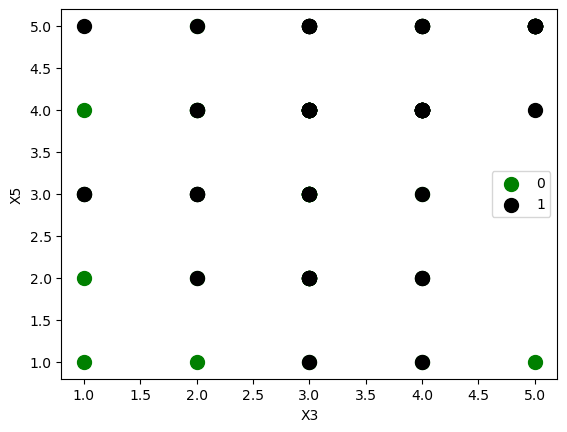

In [663]:
colors = ['green','black']
IsHappy= [0,1]
for i in range(2):
    x=data[data['Y'] == IsHappy[i]]
    plt.scatter(x['X3'],x['X5'], c=colors[i],label=IsHappy[i],s=100)
plt.xlabel("X3")
plt.ylabel("X5")
plt.legend();

Some important functions

In [664]:
# Forming different layers here.
def Layers(NumberOfInputs, NumberOfNeuronsInNextLayer):
  np.random.seed(1)
  weights = np.random.randn(NumberOfInputs, NumberOfNeuronsInNextLayer)
  biases = np.random.randn(NumberOfNeuronsInNextLayer)
  return weights, biases

# Multiplying inputs with weights and adding biases to them.
def LayersInputsProduct(Inputs, weight, biases):
  output_matrix_of_layer = np.dot(Inputs, weight) + biases
  return output_matrix_of_layer

def ReLuActivation(inputs):
  ReLU_activation_output = np.maximum(0, inputs)
  return ReLU_activation_output

def derRelu(z):
  z[z<=0] = 0
  z[z>0] = 1
  return z

def SigmoidActivation(inputs):
  Sigmoid_activation_output = 1 / (1 + np.exp(-inputs))
  return Sigmoid_activation_output

def Binary_Cross_Entropy(y_true, y_predicted):
  # To make y_true a 2d array or 1-column matrix to fit in cost-formula.
  numberOfSamples = len(y_true)
  y_predicted_clipped = np.clip(y_predicted, 1e-7, 1-1e-7)

  # Actually I am breaking that algorithm in two parts for easy understanding. Then join them together in 3rd line below.
  part1 = y_true * np.log(y_predicted_clipped + 1e-7)
  part2 = (1-y_true) * np.log(1-y_predicted_clipped + 1e-7)
  MeanValue = -1/numberOfSamples *np.sum(part1 + part2)
  return MeanValue

In [665]:
layer0Weights, layer0biases = Layers(X_train.shape[1], 10)
layer1Weights, layer1biases = Layers(layer0Weights.shape[1], 6)
layer2Weights, layer2biases = Layers(layer1Weights.shape[1], 1)
# layer2 is output layer. it will have only one neuron in it. Because we need some binary output.
# print(layer1Weights.shape[1])

# layer3Weights, layer3biases = Layers(layer2Weights.shape[1], 1)

In [666]:
# idrx = np.random.permutation(X_train.index)
# print(idrx)

In [667]:
# Training start time.
alpha = 0.001
Loss_output = []
iter = 297
startTime = tm.time()

#Batch size
Bach_Size = 11

Chunk_Start = 0
Chunk_End = Bach_Size

for i in range(iter):
  
  X = X_train.iloc[Chunk_Start:Chunk_End]
  y = y_train.iloc[Chunk_Start:Chunk_End]
  y = y.values.reshape(-1,1)
  Chunk_Start += Bach_Size
  Chunk_End += Bach_Size
  

  if i%9 == 0:
    # m = X.shape[0]
    Chunk_Start = 0
    Chunk_End = Bach_Size
    idx = np.random.permutation(X_train.index)
    X_train = X_train.reindex(idx)
    y_train = y_train.reindex(idx)

  layer0output = LayersInputsProduct(X, layer0Weights, layer0biases)
  layer0outputafterActivation = ReLuActivation(layer0output)


  layer1output = LayersInputsProduct(layer0outputafterActivation, layer1Weights, layer1biases)
  layer1outputafterActivation = ReLuActivation(layer1output)

  # For binary output it is best to choose sigmoid activation function and have one neuron.
  # ActivationOfLayer1 will return the number of columns or number of features in dataset returned from ActivationOfLayer1.

  layer2output = LayersInputsProduct(layer1outputafterActivation, layer2Weights, layer2biases)
  layer2outputafterActivation = SigmoidActivation(layer2output)
  layer2outputafterActivation = layer2outputafterActivation.astype(float)

  loss = Binary_Cross_Entropy(y, layer2outputafterActivation)
  # if i%8 == 0:
  #   accuracy1 = int(sum(y_test == layer2outputafterActivation) / len(y_test) * 100)
  #   print("Accuracy: " + str(accuracy1) +"%")
  
  ActL2Inverse = 1 - layer2outputafterActivation
  yIverse = 1 - y

  # Finding derivative of loss with respect to weights and biases.
  # Gradient descent of output layer and weights of output layer
  # Output layer
  DerWrtLayer2outputafterActivation = np.divide(yIverse, (ActL2Inverse + 1e-7 )) - np.divide(y, (layer2outputafterActivation  + 1e-7))
  DerWrtSigmoid = layer2outputafterActivation * (ActL2Inverse)
  DerOfLosWrtLayer2output = DerWrtLayer2outputafterActivation * DerWrtSigmoid

  # Gradient descent of output layer weights and biases
  DerWrtLayer2Weights = layer1outputafterActivation.T.dot(DerOfLosWrtLayer2output)
  DerWrtLayer2biases = np.sum(DerOfLosWrtLayer2output, axis=0, keepdims=True)

  # 2nd hidden layer
  DerWrtLayer1outputafterActivation = DerOfLosWrtLayer2output.dot(layer2Weights.T)
  DerWrtLayer1output = DerWrtLayer1outputafterActivation * derRelu(layer1output)

  # Gradient descent of second hidden layer weights and biases
  DerWrtLayer1Weights = layer0outputafterActivation.T.dot(DerWrtLayer1output)
  DerWrtLayer1biases = np.sum(DerWrtLayer1output, axis=0, keepdims=True)
  # 1st Hidden layer
  DerWrtLayer0outputafterActivation = DerWrtLayer1output.dot(layer1Weights.T)
  DerWrtLayer0output = DerWrtLayer0outputafterActivation * derRelu(layer0output)
  
  # Gradient descent of first hidden layer weights and biases
  DerWrtLayer0Weights = X.values.T.dot(DerWrtLayer0output)
  DerWrtLayer0biases = np.sum(DerWrtLayer0output, axis=0, keepdims=True)

  #updating the weights and bias
  layer0Weights = layer0Weights - alpha * DerWrtLayer0Weights
  layer1Weights = layer1Weights - alpha * DerWrtLayer1Weights
  layer2Weights = layer2Weights - alpha * DerWrtLayer2Weights
  layer0biases = layer0biases - alpha * DerWrtLayer0biases
  layer1biases = layer1biases - alpha * DerWrtLayer1biases
  layer2biases = layer2biases - alpha * DerWrtLayer2biases

  Loss_output.append(loss)

# Training end time.
print("Total traing time: "+ str(tm.time() - startTime) + "s.")

Total traing time: 0.4225788116455078s.


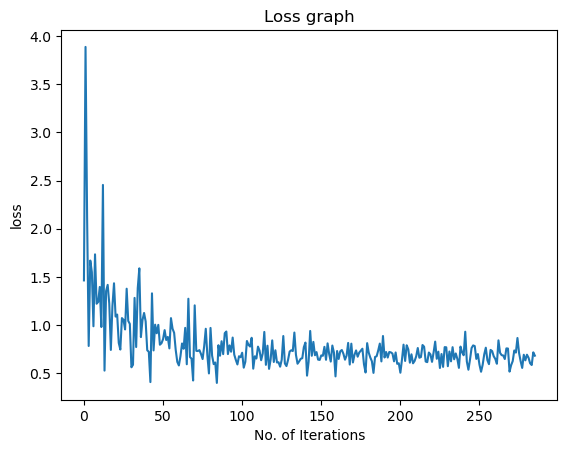

In [668]:
#print(layer1Weights)
layer0output = LayersInputsProduct(X_test.values, layer0Weights, layer0biases)
layer0outputafterActivation = ReLuActivation(layer0output)

layer1output = LayersInputsProduct(layer0outputafterActivation, layer1Weights, layer1biases)
layer1outputafterActivation = ReLuActivation(layer1output)

layer2output = LayersInputsProduct(layer1outputafterActivation, layer2Weights, layer2biases)
layer2outputafterActivation = SigmoidActivation(layer2output)
y_predict0 = np.round(layer2outputafterActivation)


plt.plot(Loss_output)
plt.title("Loss graph")
plt.xlabel("No. of Iterations")
plt.ylabel("loss")
plt.show()

In [669]:
accuracy1 = int(sum(y_test == y_predict0) / len(y_test) * 100)
print("Accuracy: " + str(accuracy1) +"%")

Accuracy: 68%


C:\Users\Abdul Hayee\AppData\Local\Temp\ipykernel_11000\2824374520.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy1 = int(sum(y_test == y_predict0) / len(y_test) * 100)


In [670]:
accuracies = []
starterNum = 0
EndNum = 13
for i in range(10):
    
    Foldxtest = Normalized_Data.iloc[starterNum:EndNum]
    FoldyTest = Y.iloc[starterNum:EndNum]
    FoldyTest = FoldyTest.values.reshape(-1, 1)
    if i < 5:
        starterNum = starterNum + 13
        EndNum = EndNum + 13
    else:
        starterNum = starterNum + 12
        EndNum = EndNum + 12
    layer0output = LayersInputsProduct(Foldxtest.values, layer0Weights, layer0biases)
    layer0outputafterActivation = ReLuActivation(layer0output)
    
    layer1output = LayersInputsProduct(layer0outputafterActivation, layer1Weights, layer1biases)
    layer1outputafterActivation = ReLuActivation(layer1output)

    layer2output = LayersInputsProduct(layer1outputafterActivation, layer2Weights, layer2biases)
    layer2outputafterActivation = SigmoidActivation(layer2output)
    y_predict = np.round(layer2outputafterActivation)
    
    accuracy = int(sum(FoldyTest == y_predict) / len(FoldyTest) * 100)
    accuracies.append(accuracy)
print(accuracies)
print(np.mean(accuracies))

[30, 46, 61, 53, 84, 53, 23, 53, 69, 76]
54.8


C:\Users\Abdul Hayee\AppData\Local\Temp\ipykernel_11000\1989389454.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = int(sum(FoldyTest == y_predict) / len(FoldyTest) * 100)


In [671]:
TP = 0
TN = 0
FP = 0
FN = 0

for t,p in zip(y_test, y_predict0):
    if (t == 0 and  p == 0):
        TP = TP + 1
    elif (t == 1 and p == 1):
        TN = TN + 1
    elif (t == 0 and p == 1):
        FN = FN + 1
    elif (t == 1 and p == 0):
        FP = FP + 1

print("True Positives (Actually no happy and NN shows no happy): ", TP)
print("True Negatives (Actually happy and NN shows happy): ", TN)
print("False Positives (Actually happy but NN shows no happy): ", FP)
print("False Negatives (Actually no happy but NN shows happy): ", FN)

True Positives (Actually no happy and NN shows no happy):  3
True Negatives (Actually happy and NN shows happy):  12
False Positives (Actually happy but NN shows no happy):  1
False Negatives (Actually no happy but NN shows happy):  6


In [672]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Load the data
# data = pd.read_csv("./HappyCustomerDataset/ACME-HappinessSurvey2020.csv")  # Replace "your_data.csv" with your actual file path
# Xdat = data[['X1', 'X3', 'X4','X5','X6']].copy()
# y = data.iloc[:, 0].values   # Target (customer happiness)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(Xdat, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# # Build the neural network model
# model = Sequential([
#     Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(6, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=600, batch_size=12, validation_split=0.1, verbose=1)

# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test_scaled, y_test)
# print(f"Test Accuracy: {accuracy*100:.2f}%")
